## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

---
title: "PA_8_1_Bastiaan"
jupyter: python3
format:
  html:
    embed-resources: true
---

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

url = "https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1"
heart = pd.read_csv(url)

heart["diagnosis_binary"] = heart["diagnosis"].str.lower().eq("disease").astype(int)

X = heart[["age", "chol"]].values
y = heart["diagnosis_binary"].values

heart.head()


,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,diagnosis_binary
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,1
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0
3,Mikaila Block,43,1,1,115,303,1,181,Disease,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1


In [2]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

beta0 = log_reg.intercept_[0]
beta_age, beta_chol = log_reg.coef_[0]

age_val = 55

chol_50 = -(beta0 + beta_age * age_val) / beta_chol

logit_90 = np.log(0.9 / 0.1)
chol_90 = (logit_90 - beta0 - beta_age * age_val) / beta_chol

chol_50, chol_90

(np.float64(367.8748897986047), np.float64(-851.966099678099))

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [3]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

gamma0 = lda.intercept_[0]
gamma_age, gamma_chol = lda.coef_[0]

age_val = 55

chol_lda_55 = -(gamma0 + gamma_age * age_val) / gamma_chol

chol_lda_55

np.float64(368.2353575299382)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [4]:
C_values = np.logspace(-3, 3, 7)   # 0.001, 0.01, 1,10, 1000
mean_scores = []

for C in C_values:
    svc_temp = SVC(kernel="linear", C=C)
    scores = cross_val_score(svc_temp, X, y, cv=5, scoring="accuracy")
    mean_scores.append(scores.mean())
    print(f"C = {C:.3f}, mean CV accuracy = {scores.mean():.3f}")

best_C = C_values[np.argmax(mean_scores)]
best_C

C = 0.001, mean CV accuracy = 0.559
C = 0.010, mean CV accuracy = 0.569
C = 0.100, mean CV accuracy = 0.598
C = 1.000, mean CV accuracy = 0.598
C = 10.000, mean CV accuracy = 0.598
C = 100.000, mean CV accuracy = 0.598
C = 1000.000, mean CV accuracy = 0.598


np.float64(0.1)

In [5]:
svc_final = SVC(kernel="linear", C=best_C)
svc_final.fit(X, y)

delta0 = svc_final.intercept_[0]
delta_age, delta_chol = svc_final.coef_[0]

age_val = 55

chol_svc_55 = -(delta0 + delta_age * age_val) / delta_chol

chol_svc_55

np.float64(312.6638186400894)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [6]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw, theme


In [7]:
ages_grid = np.linspace(heart["age"].min(), heart["age"].max(), 200)

chol_log_line = -(beta0 + beta_age * ages_grid) / beta_chol

chol_lda_line = -(gamma0 + gamma_age * ages_grid) / gamma_chol

chol_svc_line = -(delta0 + delta_age * ages_grid) / delta_chol

df_lines = pd.DataFrame({
    "age": np.concatenate([ages_grid, ages_grid, ages_grid]),
    "chol": np.concatenate([chol_log_line, chol_lda_line, chol_svc_line]),
    "model": (["Logistic Regression"] * len(ages_grid)
              + ["LDA"] * len(ages_grid)
              + ["SVC"] * len(ages_grid))
})


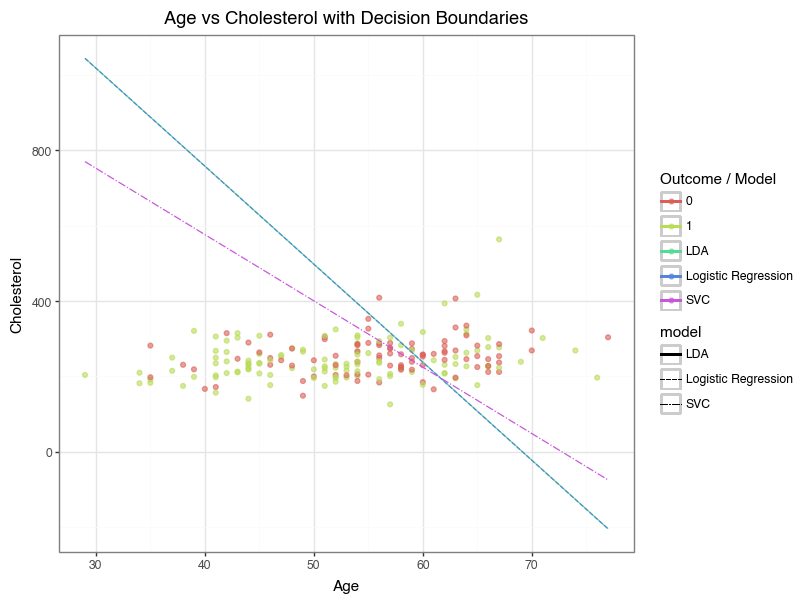

In [8]:
(
    ggplot()
    + geom_point(
        heart,
        aes(x="age", y="chol", color="factor(diagnosis_binary)"),
        alpha=0.6
    )
    + geom_line(
        df_lines,
        aes(x="age", y="chol", linetype="model", color="model")
    )
    + labs(
        x="Age",
        y="Cholesterol",
        title="Age vs Cholesterol with Decision Boundaries",
        color="Outcome / Model"
    )
    + theme_bw()
    + theme(figure_size=(8, 6))
)
